In [1]:
%matplotlib inline

# useful packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx
import time
import pandas as pd

from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit.quantum_info import Statevector
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
import qiskit

In [2]:
# Cobyla(maxiter = 2000)
seeds = np.linspace(201, 10000, 10000 - 200)

In [3]:
# graph generation

def draw_graph(G, colors, pos):
    plt.figure(dpi = 300)
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

def graph_generation(dim):
    # Generating the system
    N = dim
    G1 = nx.grid_2d_graph(N,N)
    pos = dict( (n, n) for n in G1.nodes() )
    labels = dict( ((i, j), i * N + j) for i, j in G1.nodes() )
    # Transform to weighted graph:
    n = N**2
    V = np.arange(0, N, 1)

    E =[]

    tuples = []
    other_tup = []
    point_edge_map = []
    other_map = []
    relations = []

    for edge in G1.edges:
        point1 = edge[0]
        strpoint1 = str(point1[0]) + str(point1[1])
        point2 = edge[1]
        strpoint2 = str(point2[0]) + str(point2[1])
        if not strpoint1 in point_edge_map:
            point_edge_map.append(strpoint1)
            tuples.append(edge[0])
        if not strpoint2 in other_map:
            other_map.append(strpoint2)
            other_tup.append(edge[1])
        relations.append((strpoint1, strpoint2))

    # add periodic boundary conditions
    '''
    grid = np.zeros((dim, dim)).astype('int64').tolist()
    for i in range(dim):
        for j in range(dim):
            pt = str(i) + str(j)
            grid[i][j] = pt
    for i in range(len(grid)):
        relations.append((grid[0][i], grid[dim-1][i]))
        relations.append((grid[i][0], grid[i][dim-1])) 
    '''       
    
    
    tuples.append(other_tup[len(other_tup) - 1])
    point_edge_map.append(other_map[len(other_map) - 1])

    dic = {}
    for i in range(len(point_edge_map)):
        dic[i] = point_edge_map[i]

    point_edge_map = np.array(point_edge_map)
    relations = np.array(relations)

    for relation in relations:
        ver1 = relation[0]
        ver2 = relation[1]
        point1 = np.where(point_edge_map == ver1)[0][0]
        point2 = np.where(point_edge_map == ver2)[0][0]
        edge = (point1, point2, 1.0)
        E.append(edge)

    G = nx.Graph()

    G.add_nodes_from(V)

    G.add_weighted_edges_from(E)

    colors = ["b" for node in G.nodes()]
    pos = dict()
    for i in range(n):
        pos[i] = tuples[i]


    # draw_graph(G, colors, pos)
    
    # Matrix Representation of Graph
    w = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            temp = G.get_edge_data(i, j, default=0)
            if temp != 0:
                w[i, j] = temp["weight"]
                
    return G, w, pos

In [4]:
G, w, pos = graph_generation(3)
def graph_convert(sol):
    solution_string = ''
    for i in sol:
        if i=='0' or i=='1':
            solution_string += i
    print(solution_string)
    colors = ["r" if solution_string[i] == '0' else "c" for i in range(9)]
    draw_graph(G, colors, pos)

010101010


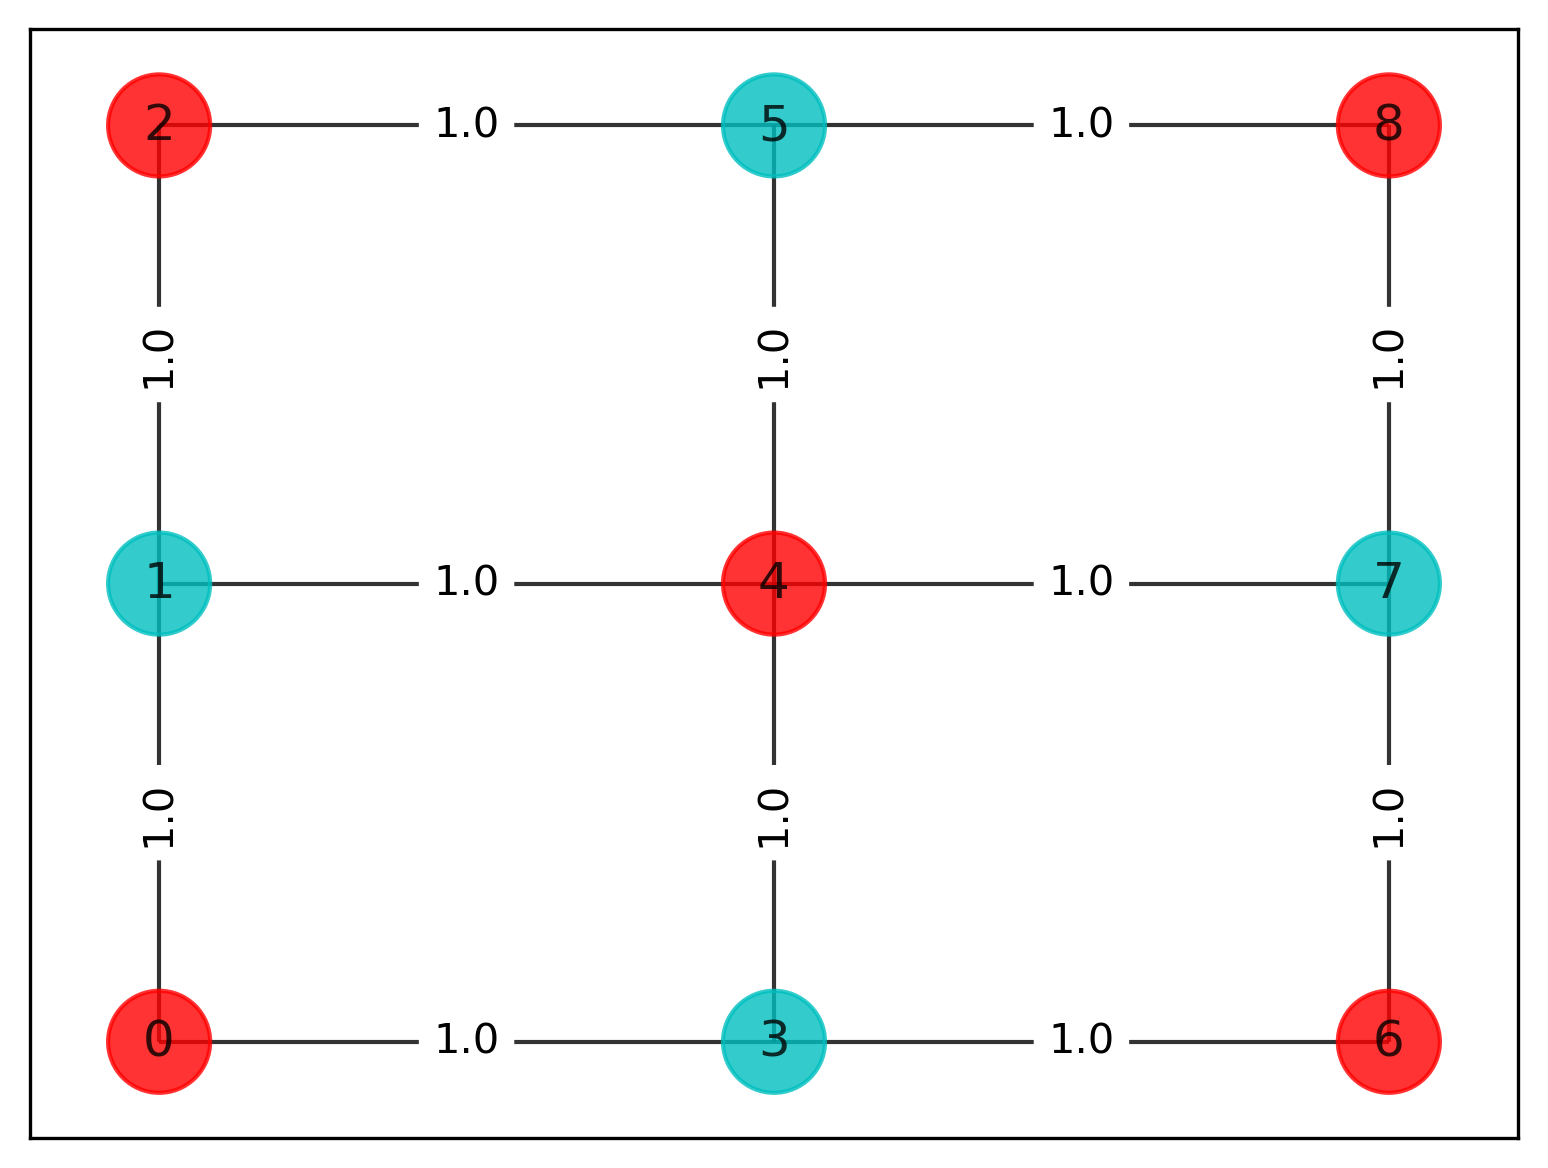

In [5]:
sol1 = '[0. 1. 0. 1. 0. 1. 0. 1. 0.]'
graph_convert(sol1)

101010101


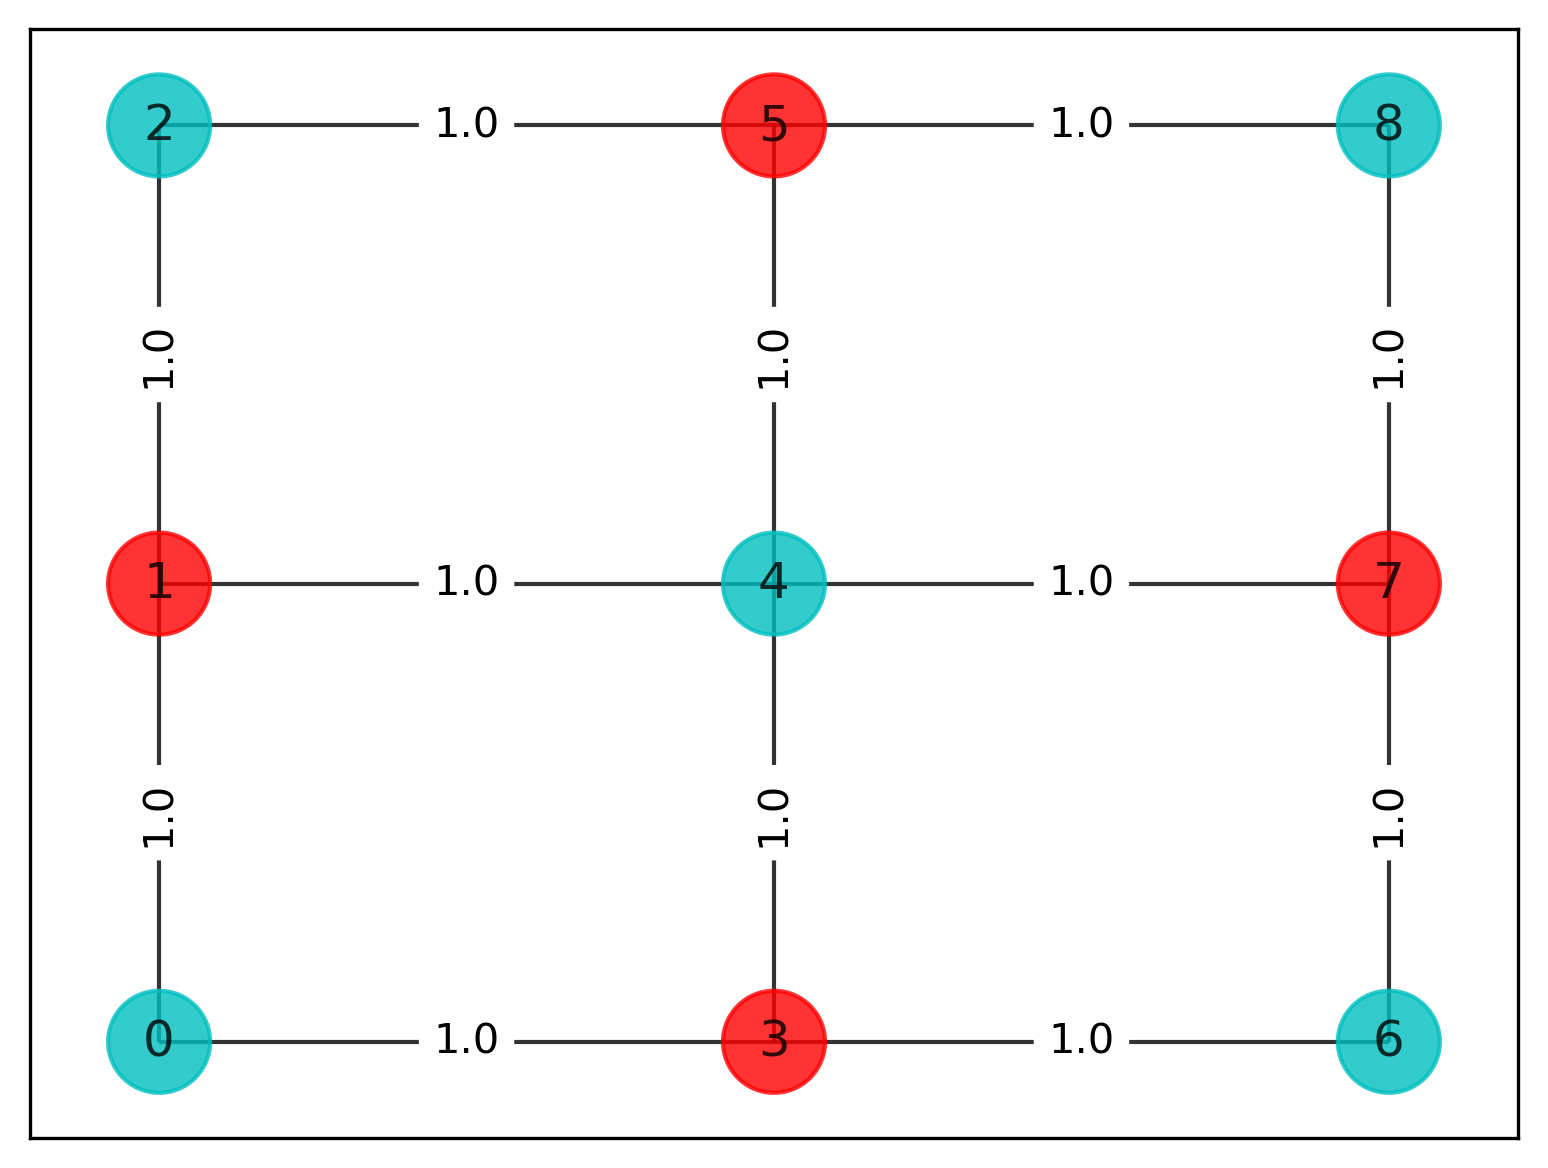

In [6]:
sol2 = '[1. 0. 1. 0. 1. 0. 1. 0. 1.]'
graph_convert(sol2)

In [7]:
seeds = np.linspace(201, 10000, 10000 - 200)
Energy = []
iterations = []
execution_time = []
df = pd.read_excel('COBYLA(2000)_D1.xlsx')
Energy += df['energy'].tolist()
iterations += df['terminate iterations'].tolist()
execution_time += df['time (s)'].tolist()
index = np.where(np.array(Energy)>=-2.1)[0]
solution = df['solution'].to_numpy()[index]

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
from IPython.display import clear_output
for i in range(20):
    print(solution[i])
    graph_convert(solution[i])
    plt.savefig('/Users/youfuqian/My Drive/College/#Research/3.MaxCut and statistical physics/Comprehensive Long run/cobyla2meta/'+str(i) +'.png')

011100011


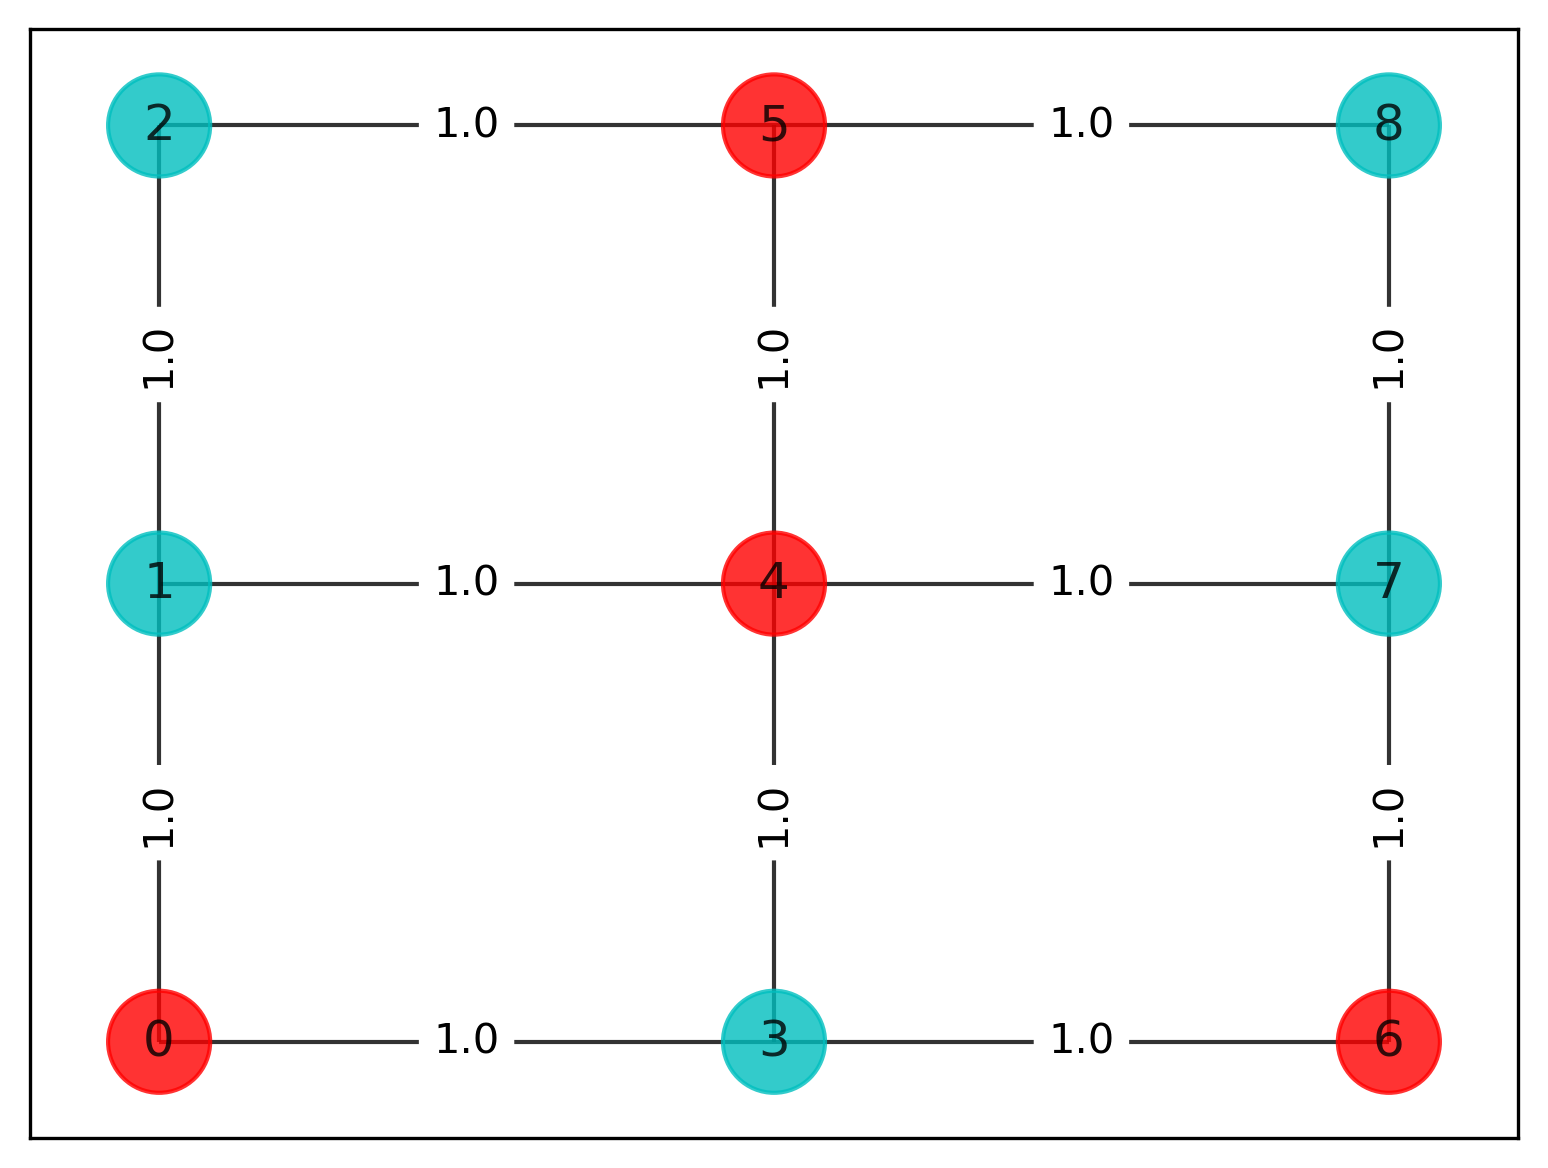

In [8]:
graph_convert('[0. 1. 1. 1. 0. 0. 0. 1. 1.]')

001100011


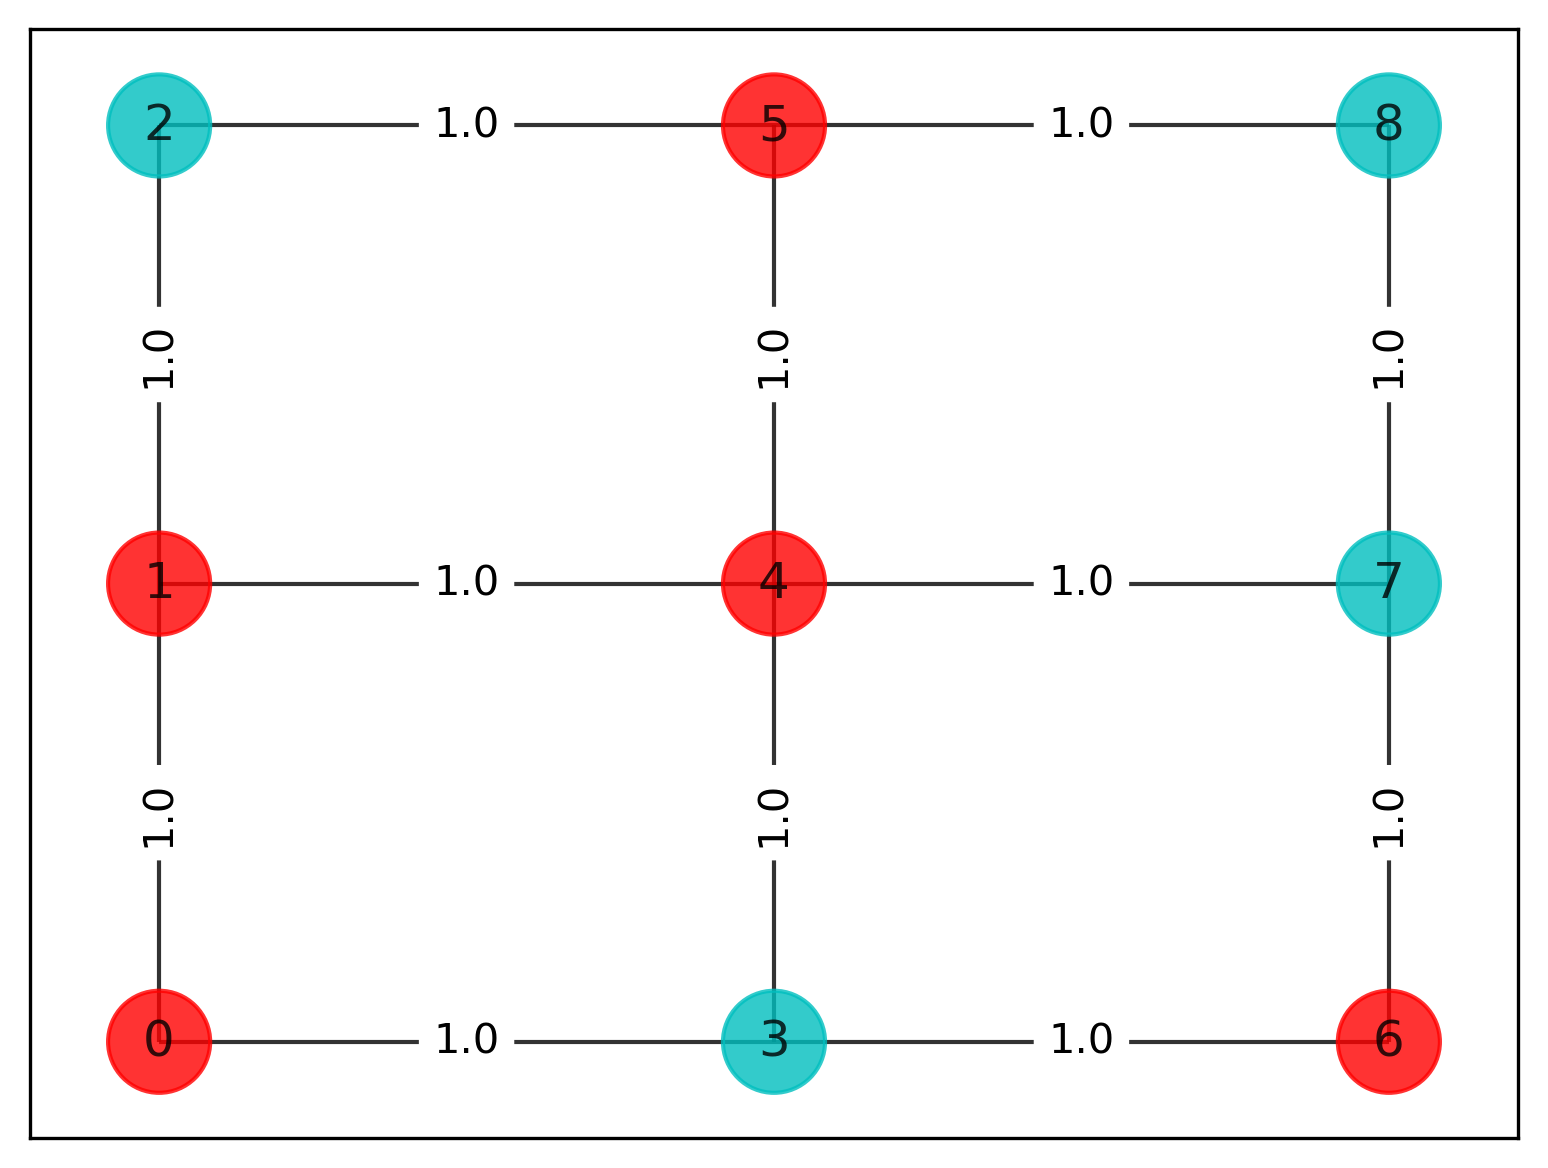

In [9]:
graph_convert('[0. 0. 1. 1. 0. 0. 0. 1. 1.]')

011100101


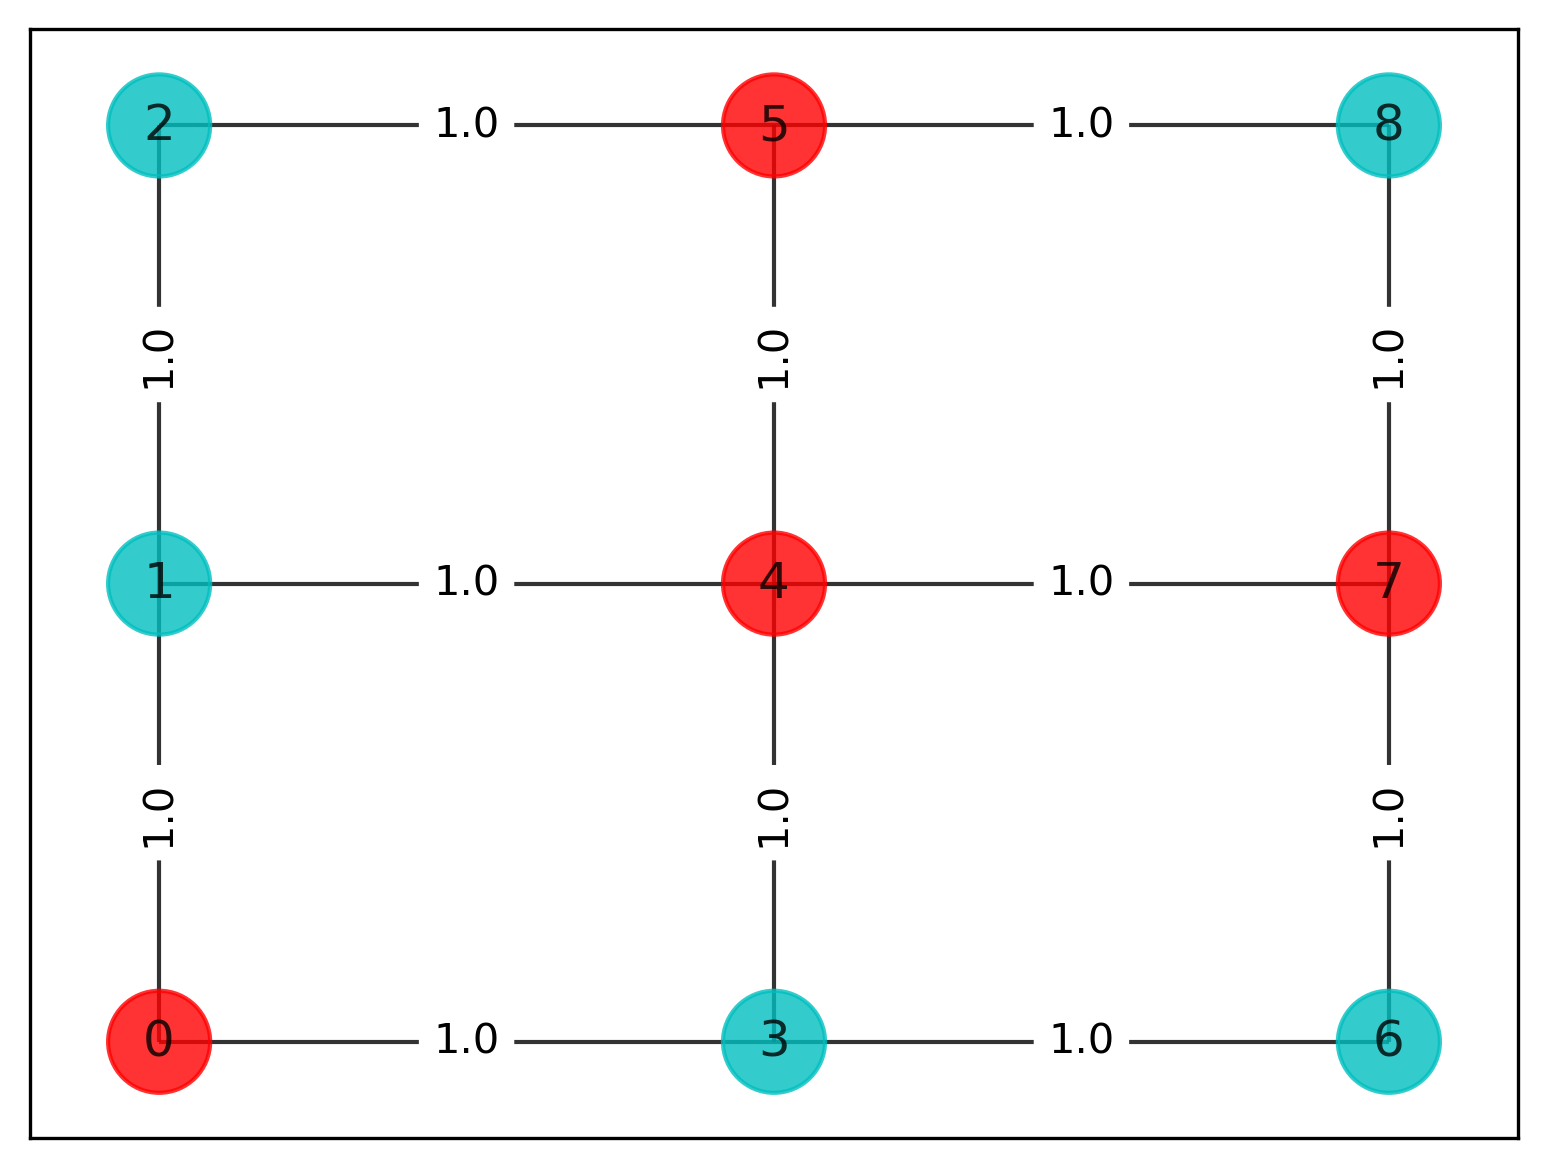

In [10]:
graph_convert('[0. 1. 1. 1. 0. 0. 1. 0. 1.]')

0101101001011010


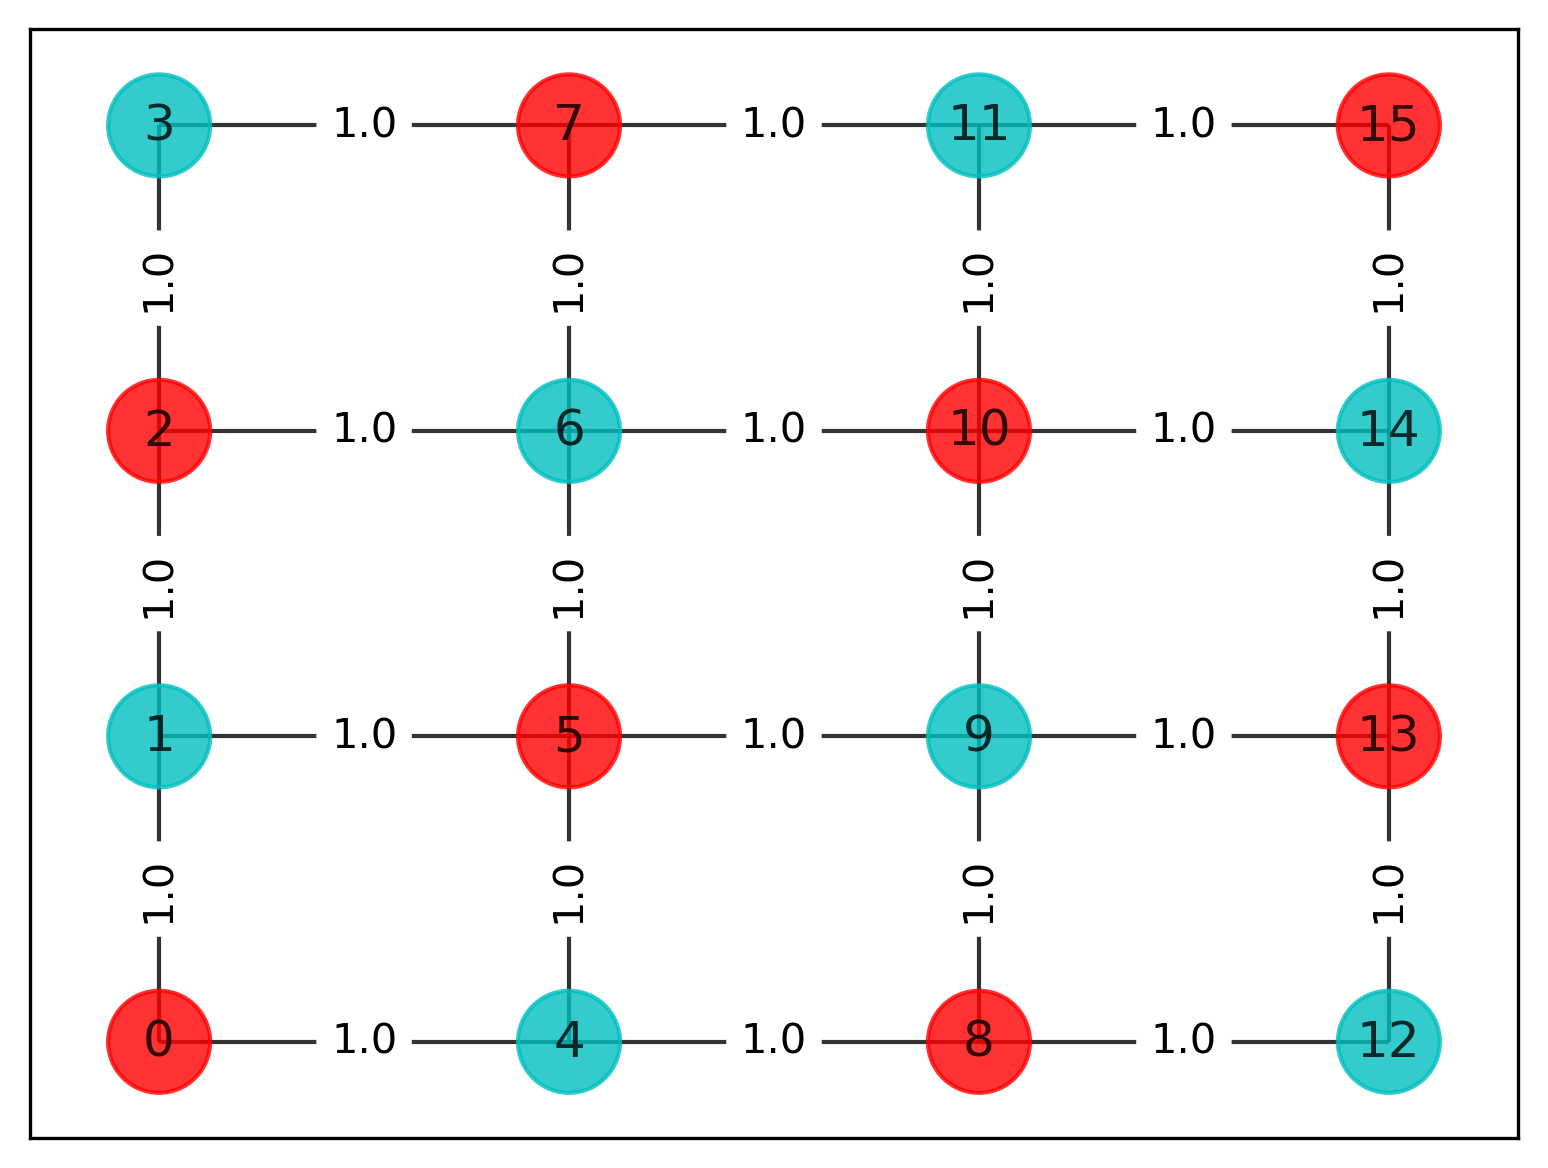

In [11]:
G, w, pos = graph_generation(4)
def graph_convert(sol):
    solution_string = ''
    for i in sol:
        if i=='0' or i=='1':
            solution_string += i
    print(solution_string)
    colors = ["r" if solution_string[i] == '0' else "c" for i in range(16)]
    draw_graph(G, colors, pos)
graph_convert('[0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0]')

0101101010010110


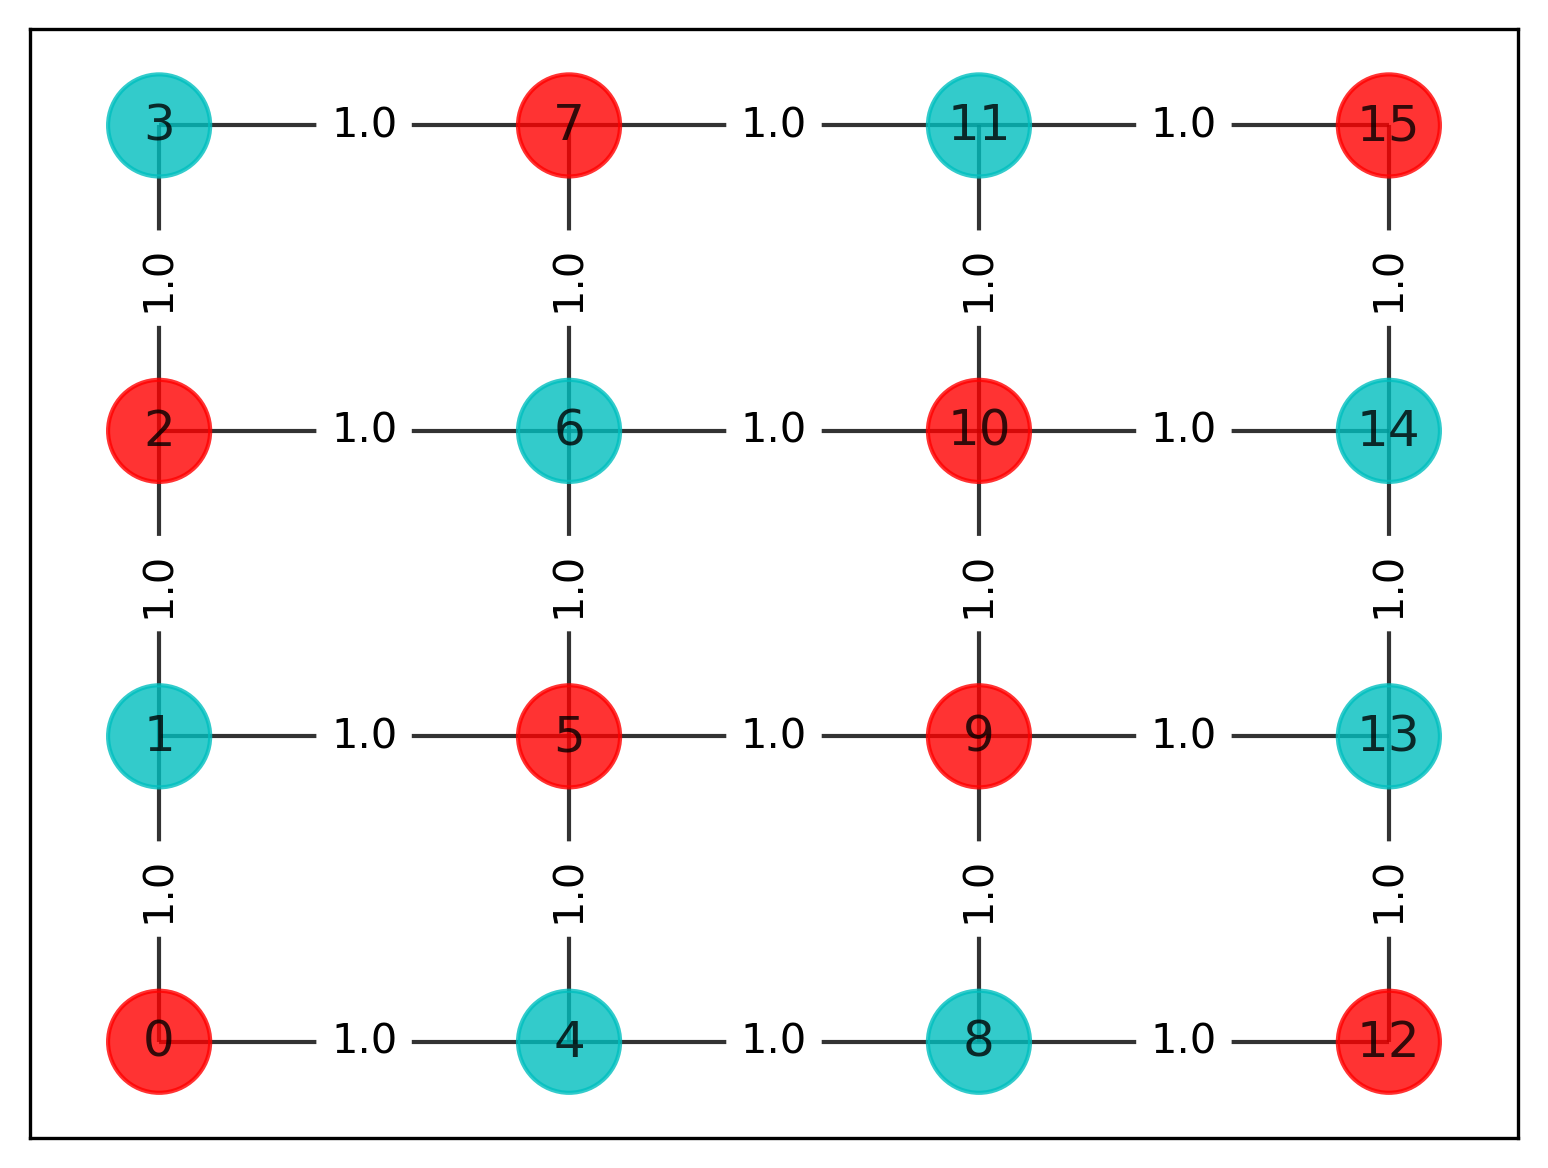

In [12]:
graph_convert('[0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0]')

1101001010100101


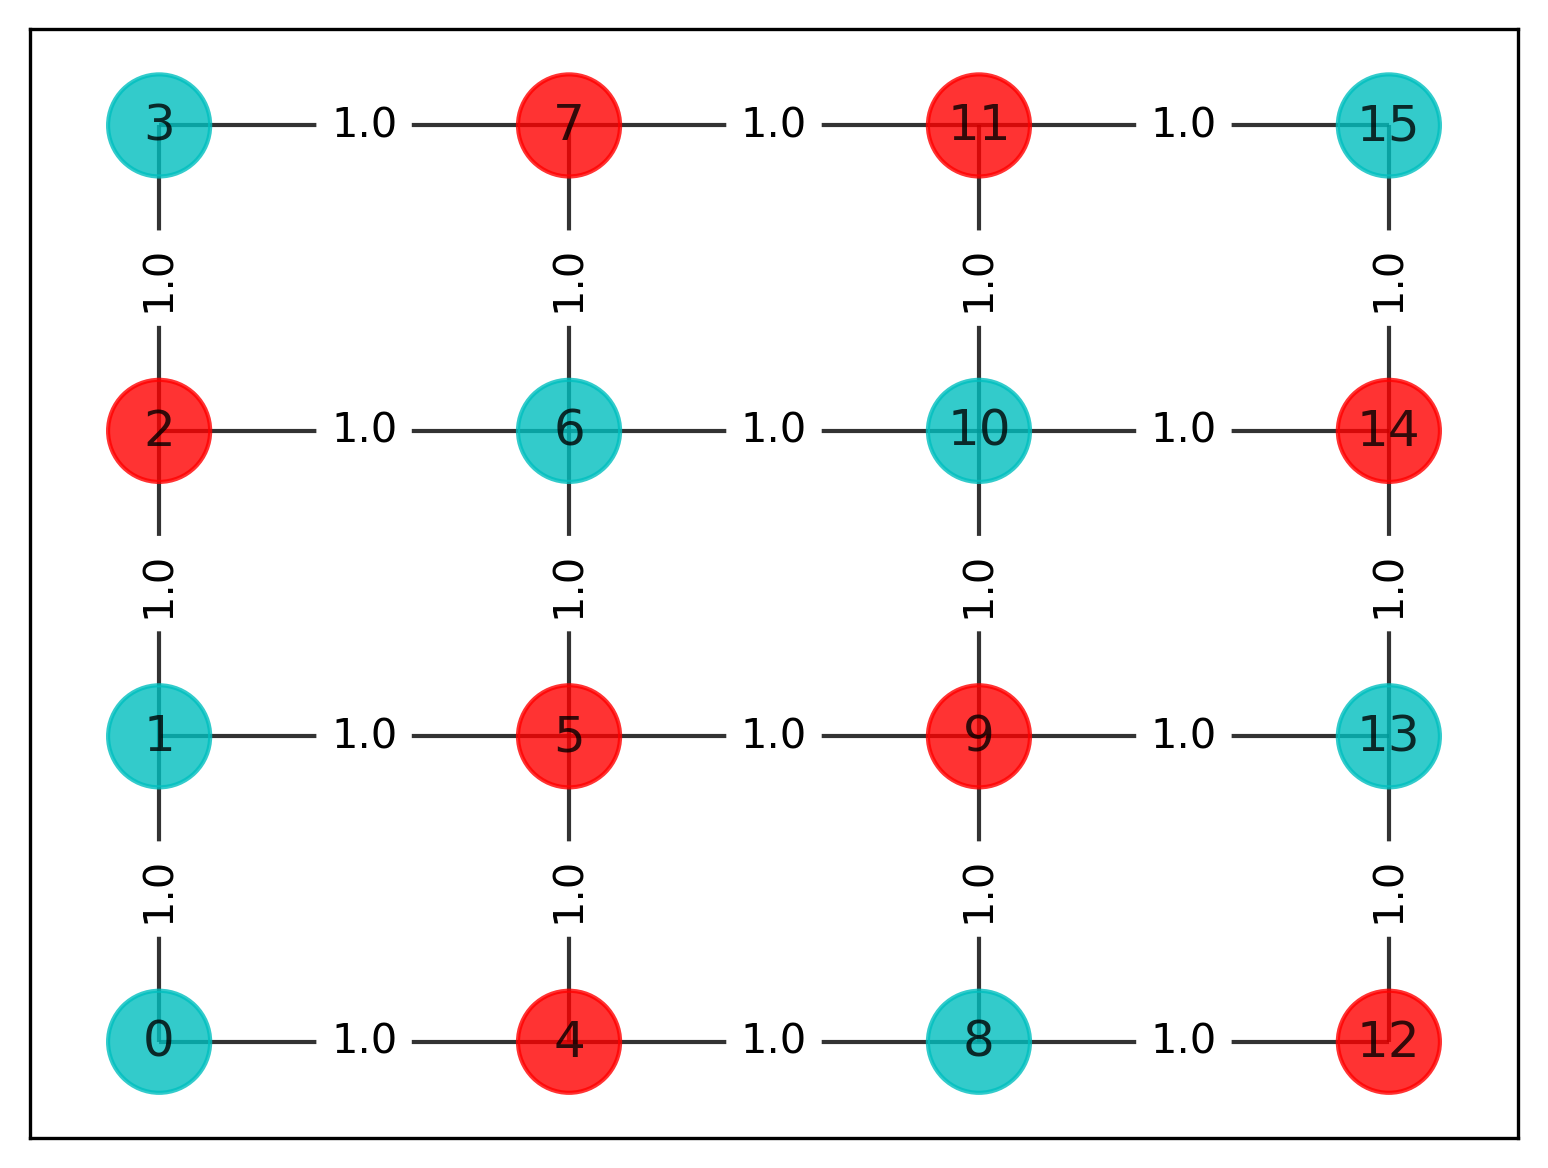

In [13]:
graph_convert('[1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1]')

1100001111000011


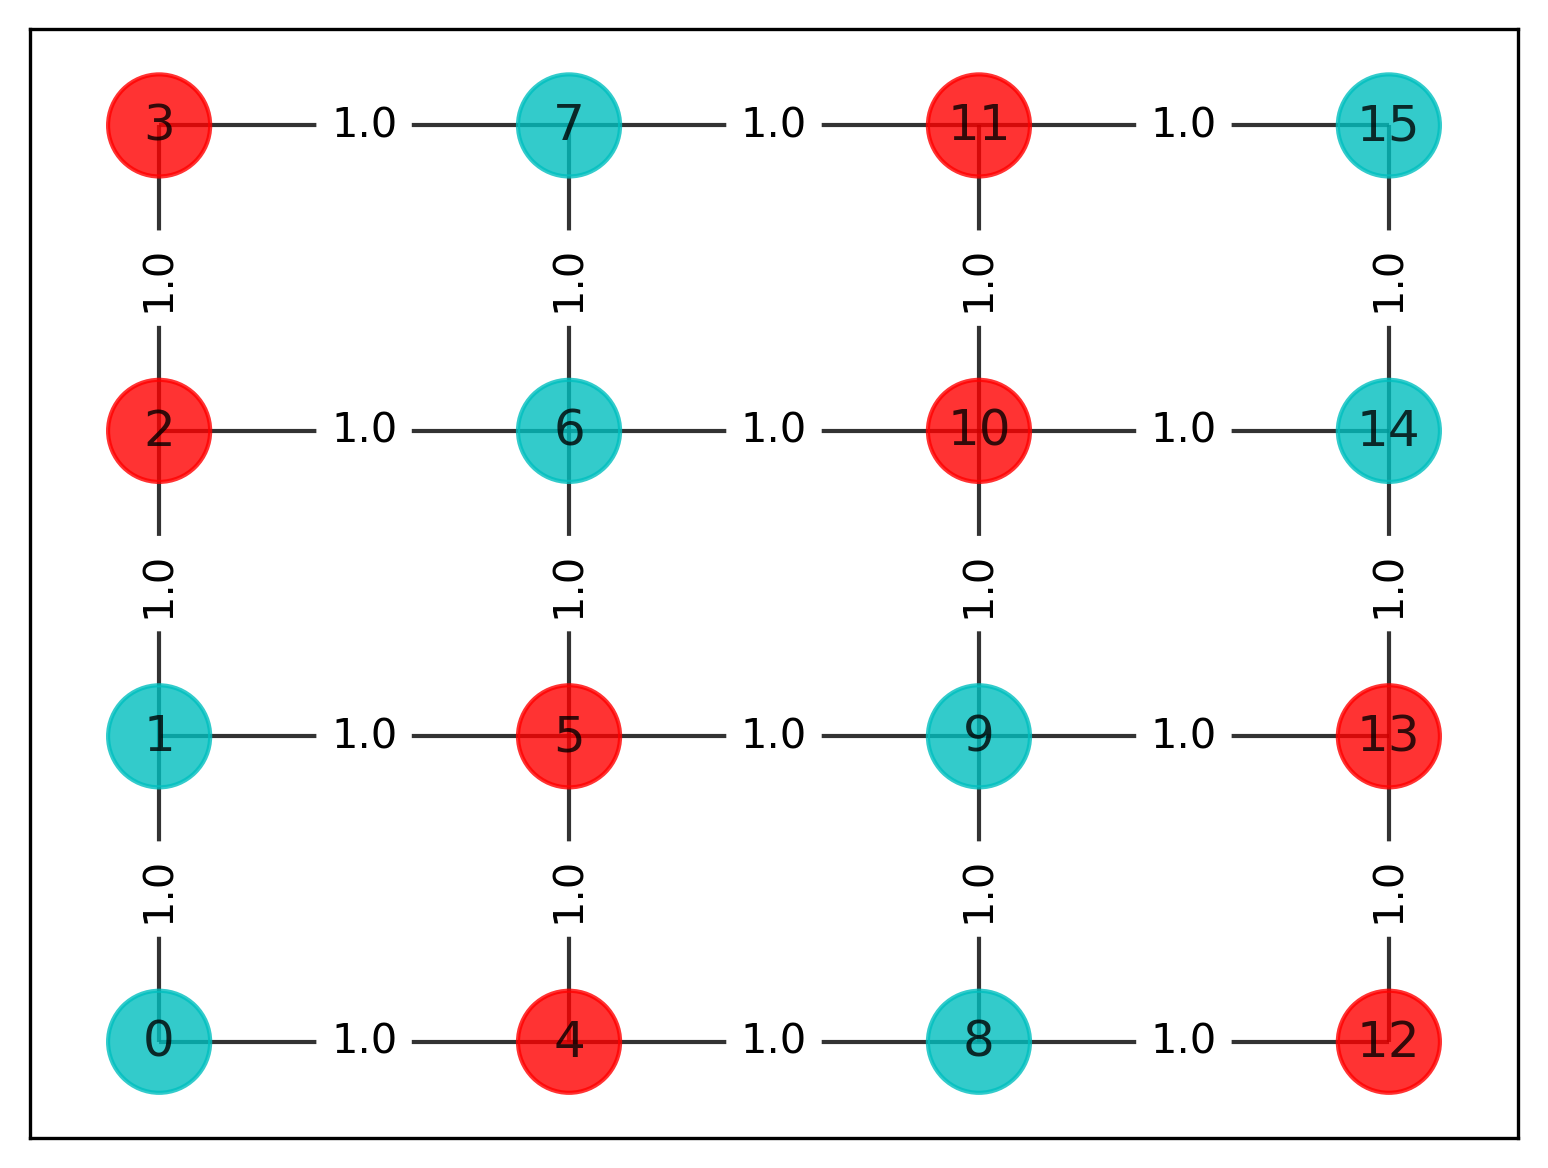

In [14]:
graph_convert('[1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1]')

1010010110100101


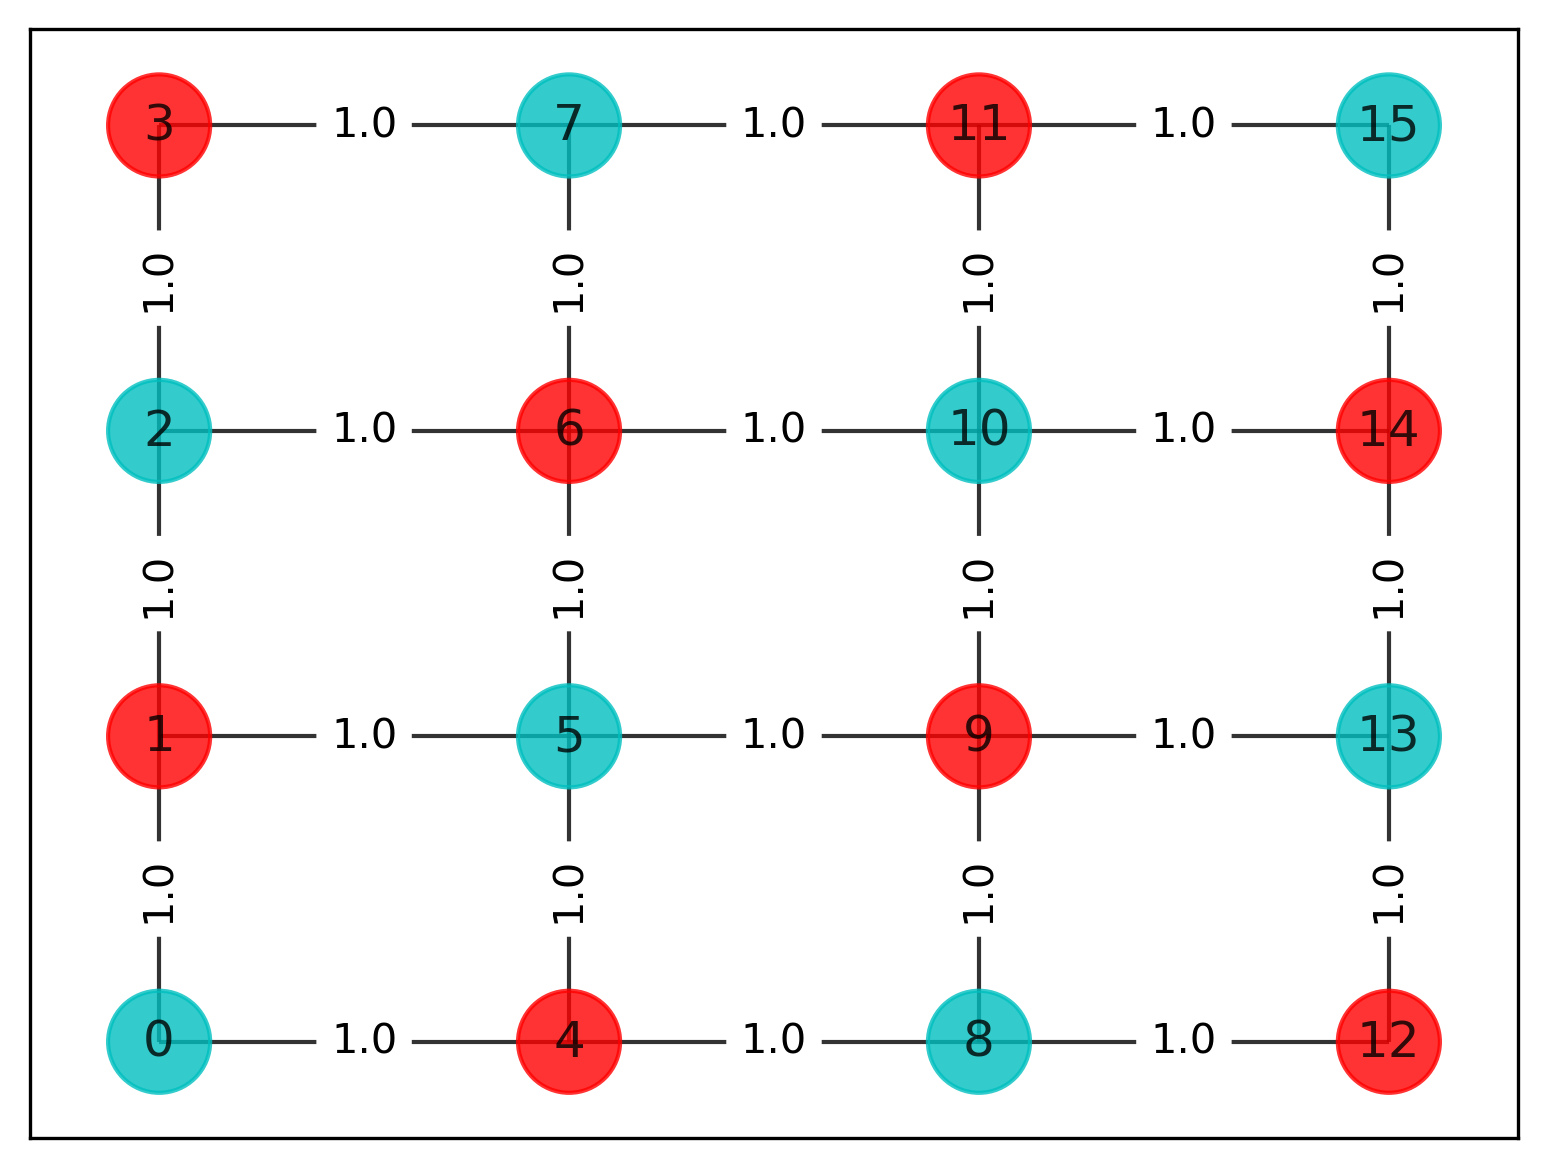

In [15]:
graph_convert('[1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1]')

0101010110101010


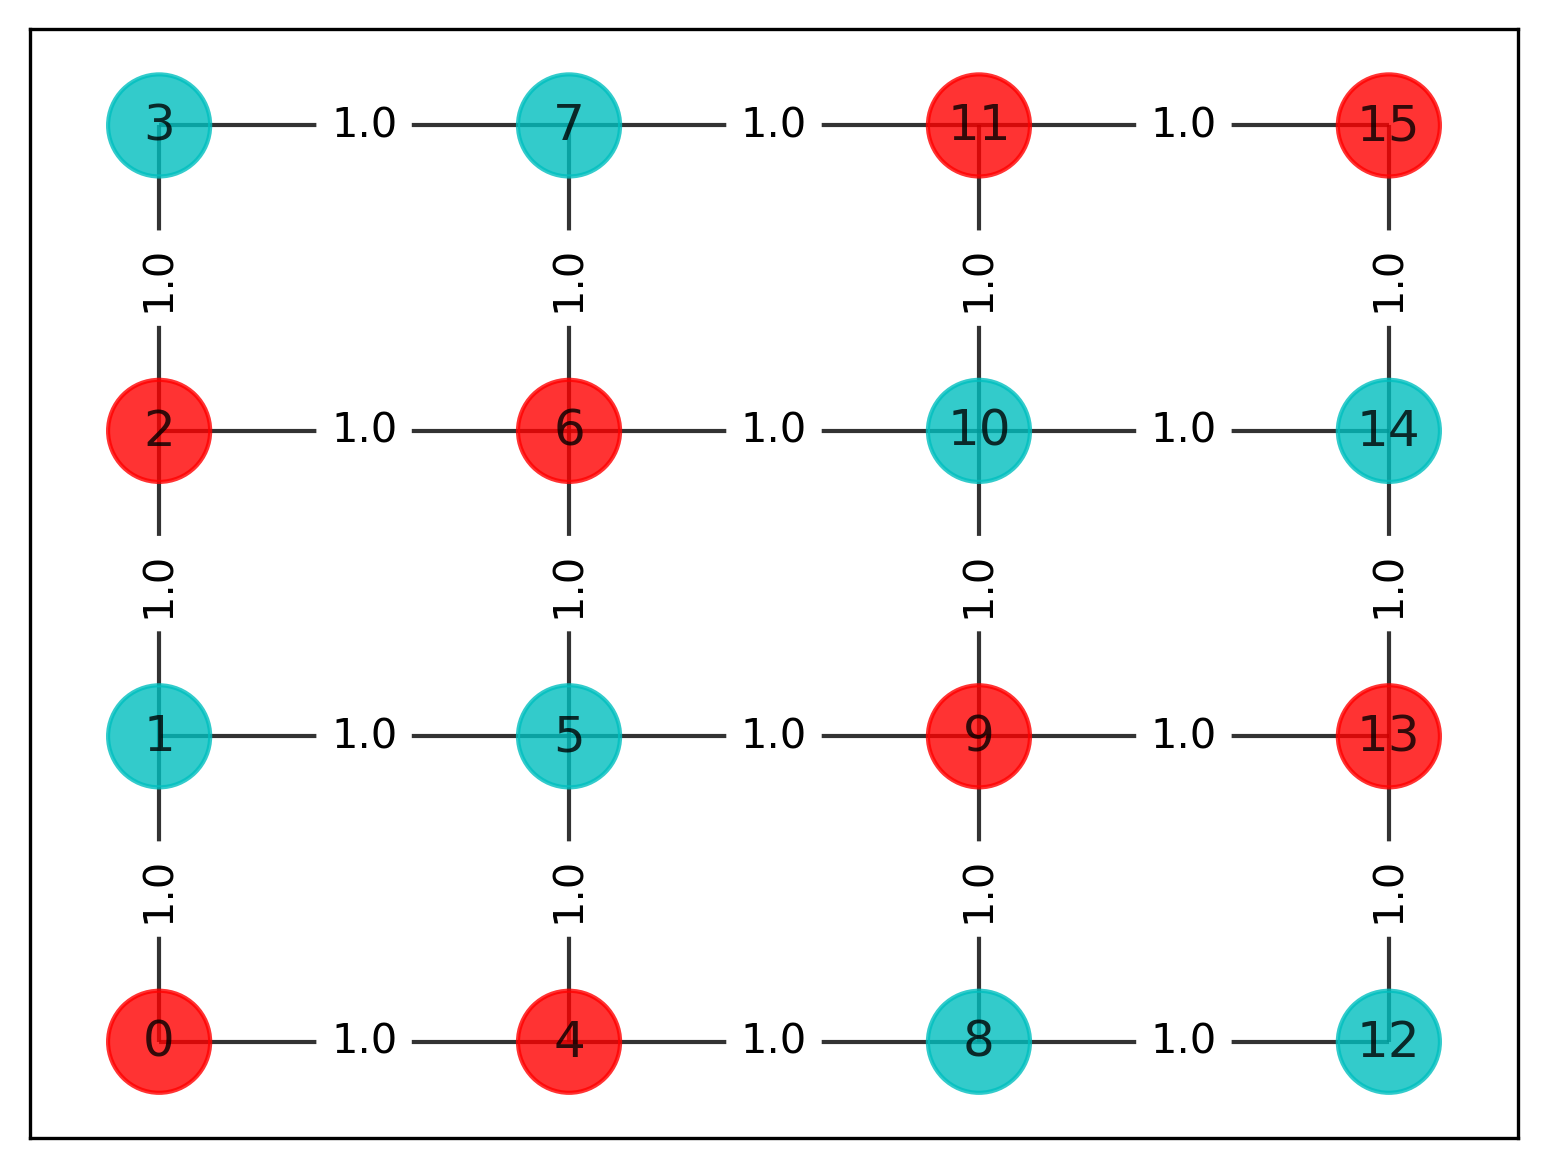

In [16]:
graph_convert('[0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0]')

1010101010101010101010101


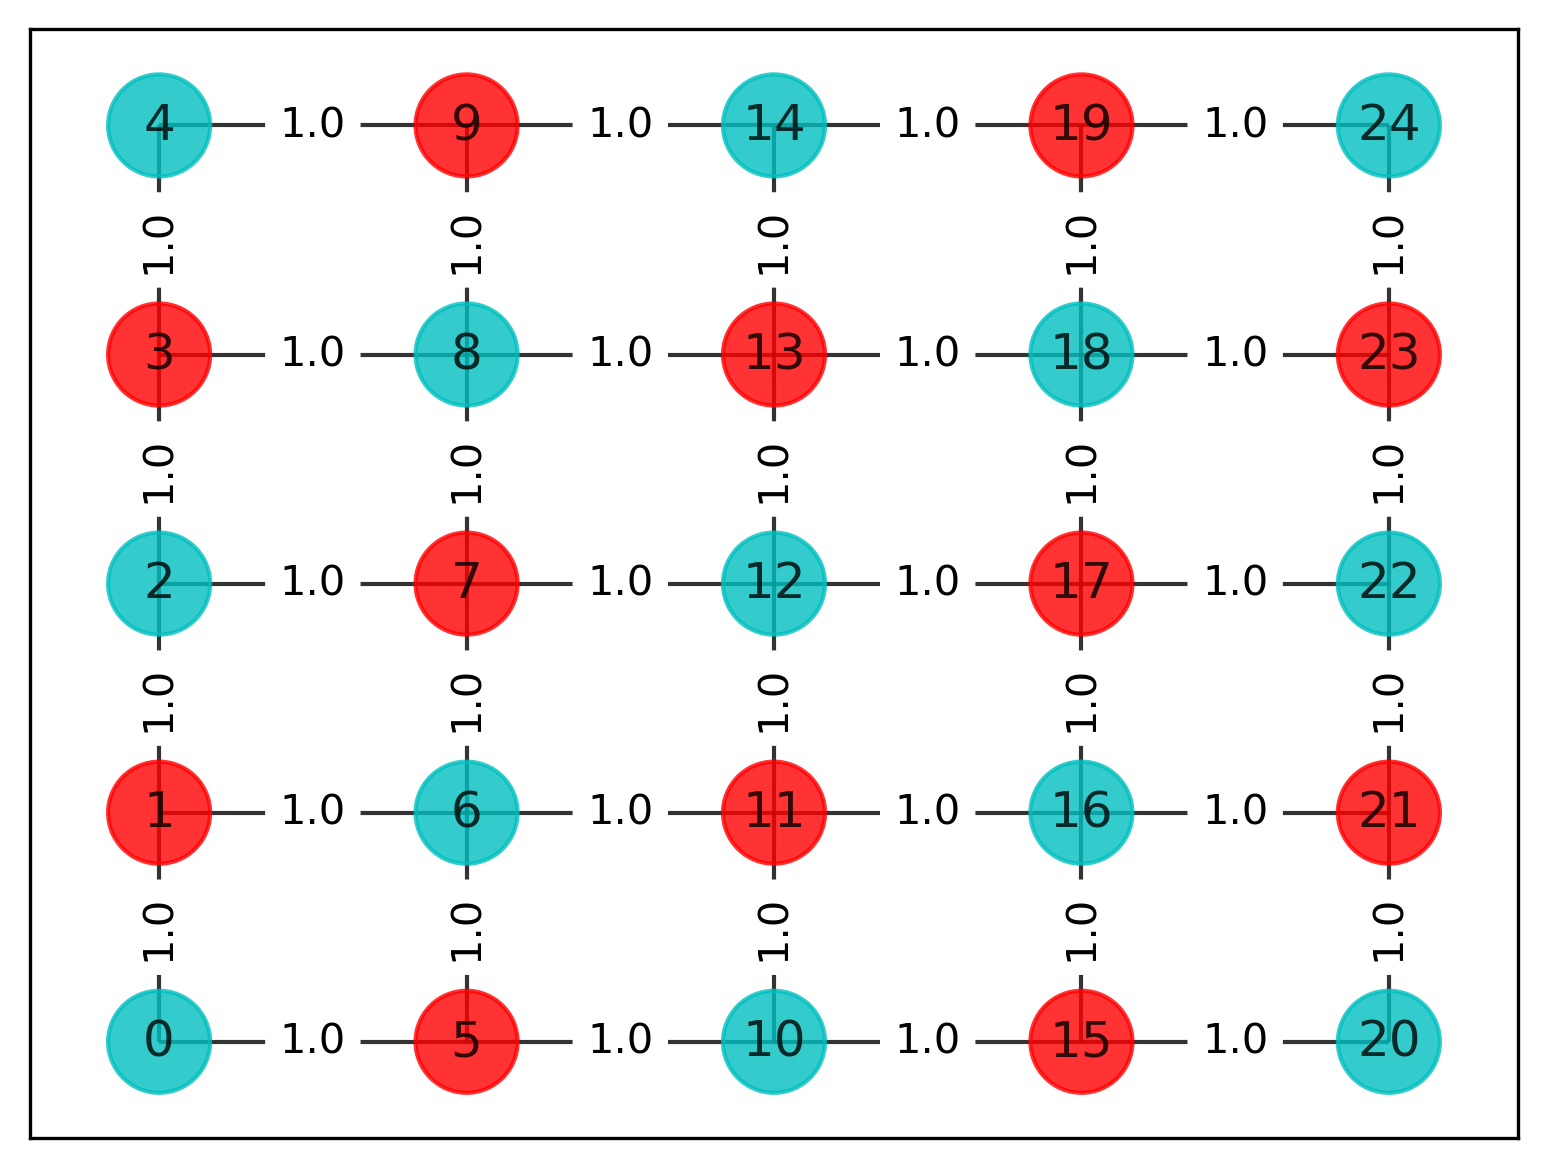

In [17]:
G, w, pos = graph_generation(5)
def graph_convert(sol):
    solution_string = ''
    for i in sol:
        if i=='0' or i=='1':
            solution_string += i
    print(solution_string)
    colors = ["r" if solution_string[i] == '0' else "c" for i in range(25)]
    draw_graph(G, colors, pos)
graph_convert('[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]')